
# Modelos discretos de Depredador-Presa


In [1]:
#Pkg.add("LsqFit")

In [2]:
using PyPlot, LaTeXStrings, TaylorSeries, LsqFit

include("AutomDiff_V2.jl")
import AD: Dual, xdual

Los Modelos de Cazador-Presa son aquellos que representan la interacción de dos especies, una como cazador y otra como presa utilziados principalmente en ecología y biología pero con un sinúmero de aplicaciones en otras áreas de física, química y hasta economía.

En ecología se llaman modelos de "Depredador—presa" o de "planta—hervíboro". En este trabajo se les llama, modelos de "Depredador-Presa".

## Un modelo simple

Siguiendo la línea del libro de  [_Allman & Rhodes_](http://bookzz.org/book/436360/381bdc "Allman, Elizabeth S.; Rhodes, John A. 2003. Mathematical models in biology. An introduction") usaremos un modelo simple en este trabajo:

Si se tienen dos especies, una de la cual es presa de la otra. También asumimos que la interacción entre las dos especies es el factor primario para determinar el tamaño de la población.

Denotamos $P_t$ el tamaño de la población de presas y $Q_t$ el tamaño de la población de de depredadores en un tiempo $t$, el cambio en la población de las dos especies está interrelacionado:

$$
\begin{aligned}
\Delta P &= F(P,Q)\\
\Delta Q &= G(P,Q)
\end{aligned}
$$

Ahora, para definir las funciones $F$ y $G$ de cambio pensemos en el caso en que no hubises predadores, la población de presas crecería hasta un punto en el que no hubiese más lugar o recursos, por lo que se emplea un crecimiento logístico, la forma discreta se escribe como:

$$
\Delta P = rP\left( 1-\frac{P}{K} \right)
$$

Si las presas son la principal fuente de comida de los depredadores, entonces la población de depredadores es directamente proporcional a la de presas:

$$
\Delta Q = -u Q
$$

Con $u$ una constante positiva.

Para introducir la interacción mutua entre las dos especies empleamos el producto $PQ$. Por lo que el modelo resulta como:

$$
\begin{aligned}
\Delta P &= rP\left( 1-\frac{P}{K} \right)-sPQ\\
\Delta Q &= -uQ+vPQ
\end{aligned}
$$

Donde $s$ y $v$ son constantes positivas que denontan que tanto afecta o beneficia la interacción entre ambas especies a las presas o a los depredadores, respectivamente.

Si escribimos el modelo en términos de la población en lugar de cambios en la población obtenemos:

 ##### Modelo simple
$$
\begin{aligned}
P_{t+1} &= P_t \left( 1+r \left( 1-\frac{P_t}{K} \right)\right)-s P_t Q_t\\
Q_{t+1} &= (1-u)Q_t+v P_t Q_t
\end{aligned}
$$

Con $r$, $s$, $u$, $v$ y $K$ constantes positivas, y $u<1$.

Observamos que el módelo es un mapeo discreto de dos dimensiones, no-lineal y múltiples constantes. Definamos la función que define el mapeo:

In [3]:
"""
    CP_Simple(Xt,constantes)

Dado un vector con los valores de la población de presas y depredadores 
Xt=[P,Q], realiza el siguiente paso con el modelo simple.

"""
function CP_Simple(Xt::Vector{Float64},constantes::Vector{Float64})
    
    @assert length(Xt)==2 && length(constantes) == 5
    
    r = constantes[1]
    s = constantes[2]
    u = constantes[3]
    v = constantes[4]
    K = constantes[5]
    
    #Asignación del paso 0
    P0 = Xt[1]
    Q0 = Xt[2]
    #Evaluación del modelo
    P1 = P0*(1+r*(1-P0/K))-s*P0*Q0
    Q1 = (1-u)*Q0+v*P0*Q0
    
    #Resultados
    [P1,Q1]   
end

CP_Simple

In [4]:
"""
    mapeo2D_lista(F,X_0,constantes,t)
Dada una función `F(X_0,constantes)` que define un mapeo de 2 dimensiones
un punto inicial `X_0` y las `constantes` en forma de vector, regresa dos
vectores con los `t` iterados del mapeo para cada dimensión.

"""

function mapeo2D_lista(F::Function , X_0::Vector{Float64},constantes,t::Int64)
    @assert length(X_0)==2 && t > 0
    
    X0 = X_0
    #Definición de los vectores para almacenar resultados.
    Ps = [X0[1]]
    Qs = [X0[2]]
    
    for i in 1:t-1
        X0 = F(X0,constantes)
        push!(Ps,X0[1])
        push!(Qs,X0[2])
    end
    Ps,Qs
end

mapeo_PQ_ts(v_0,r,s,u,v,t) = mapeo_PQ_ts(v_0,r,s,u,v,1.0,t)

mapeo_PQ_ts (generic function with 1 method)

Veamos un ejemplo con parámetros específicos:

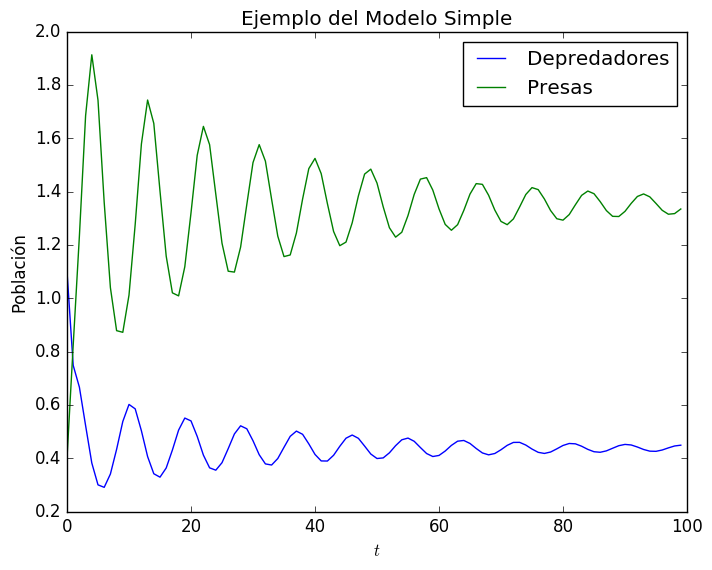

PyObject <matplotlib.text.Text object at 0x000000001E8CAF60>

In [5]:
r,s,u,v,K = 1.2,.5,.7,1.6,1.
const1 = [r,s,u,v,K]
X0 = [1.10,0.40]

Ps1,Qs1 = mapeo2D_lista(CP_Simple,X0,const1,100)

plot(Ps1,label="Depredadores")
plot(Qs1,label="Presas")
xlabel(L"t")
ylabel("Población")
legend()
title("Ejemplo del Modelo Simple")

El gráfico muestra las características clásicas de estos modelos, poblaciones que oscilan alrededor de un punto de queilibrio, esto es más notorio si se grafica el diagrama de fase:

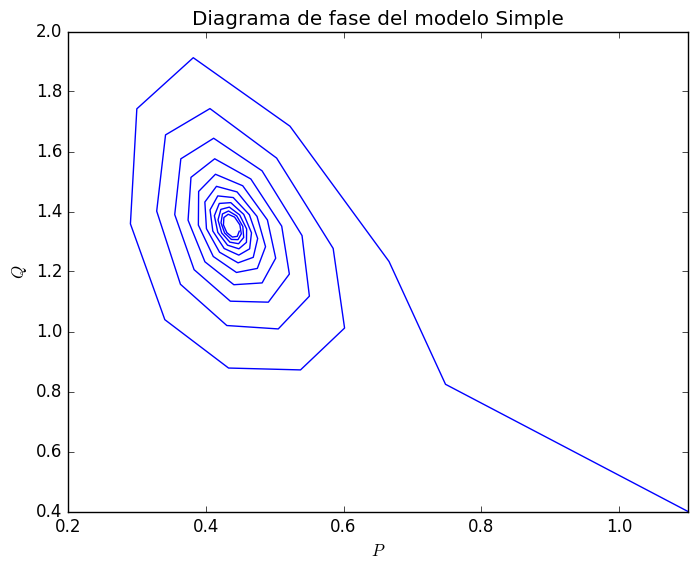

  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31


PyObject <matplotlib.text.Text object at 0x000000001EC83FD0>

In [6]:
plot(Ps1,Qs1)
xlabel(L"P")
ylabel(L"Q")
title("Diagrama de fase del modelo Simple")

## Puntos fijos

Sin perder generalidad, podemos hacer $K=1$, que de todas formas puede ser absorbida por un cambio de unidades de $P$ de la forma $P'=P/K$ y absorviendo la $K$ en las constantes.

Buscamos $(P,Q)$ tal que 

$$
\begin{aligned}
P &= P \left( 1+r \left( 1-P \right)\right)-s P Q\\
Q &= (1-u)Q+v P Q
\end{aligned}
$$

Los puntos fijos son:


\begin{aligned}
E_0 &= [0.0 ,0.0]\\
E_1 &= [1.0 ,0.0]\\
E_2 &= \left[\frac{u}{v} ,\frac{r}{s}\left(1-\frac{u}{ v} \right) \right]
\end{aligned}

Como el modelo es de poblaciones, los puntos fijos para existir deben permanecer positivos. $E_0$ y $E_1$ siempre existen, para que la condición se cumpla en $E_3$ tenemos:

$$ 
v>u
$$

El jacobiano del mapeo para $E_2$:

$$
J(E_2)=
\begin{pmatrix}
1-\frac{ru}{v} & -\frac{su}{v} \\ 
 \frac{r(-u+v)}{s}& 1
\end{pmatrix}
$$

La ecuación característica del Jacobiano:

$$\lambda^2+\alpha_1\lambda+\alpha_2=0$$

con $\alpha_1=-trJ=-2+\frac{ru}{v}$, $\alpha_2=detJ=1+\frac{ru(-1-u+v)}{v}$:

Entonces:

$$
\lambda_{1,2}=-\frac{\alpha_1}{2}\pm\sqrt{\Delta}=1-\frac{ru}{2v}\pm\sqrt{\Delta}
$$

donde $\Delta=\left(\frac{\alpha_1}{2}\right)^2-\alpha_2=\frac{ru\left(ru+4uv-4v^2\right)}{4v^2}$

Si $\Delta>0$, entonces $r_\Delta>-\frac{4(uv-v^2)}{u}$, de lo contrario los eigenvalores son complejos.

Seguramente cuando el valor de $\Delta$ cambie de imaginario a real ocurrirá un cambio de comportamiento.


Con los 
$$
\begin{aligned}
\lambda_{1,2} = 1 &\Rightarrow  r_{\lambda_{1,2}=1}=0 \\
\lambda_{1,2} =0 &\Rightarrow  r_{\lambda_{1,2}=0}=\frac{v_{\lambda_1=0}}{u+u^2-uv}\\
\lambda_{1,2} =-1 &\Rightarrow  r_{\lambda_{1,2}=-1}=\frac{4v}{u(2+u-v)}
\end{aligned}
$$


Ahora, igualamos 
$$
\begin{aligned}
r_\Delta=r_{\lambda_{1,2}=0} &\Rightarrow  v_{\lambda_{1,2}=0}=\frac{1}{2}(1+2u) \\
r_\Delta=r_{\lambda_{1,2}=1} &\Rightarrow  v_{\lambda_{1,2}=0}=1+u
\end{aligned}
$$

Tenemos que revisar tres intervalos, para distintas $r's$, con enfásis en $r_\Delta$. Como observación, vemos que la constante $s$ no define la dinámica, simplemente se limita a cambiar la posición del punto de equilibro $E_2$.

## Espectro de Lyapunov.
Una herramienta interesante en los mapeos discretos es el espectro de Lyapunov, que nos puede dar información de que tipo de sistema es descrito por este modelo. 

$$ \lambda_i = \lim_{n\rightarrow\infty}\log_2\frac{p_{j}}{\rho}$$

Dónde $\rho$ es el diámetro inicial de una circunferencia en el diagrama fase, y $p_{j}$ es el largo del eje más grande del elipsoide deformado. ([Wolf, 1984](http://www.dynamics.unam.edu/DinamicaNoLineal/Bibliografia/SDC/PorRevisar/impact-osc/impact01.pdf "Wolf, A.; et al. 1984. Determining Lyapunov Exponents from a time series"))



In [7]:
function Lyapunov2D(F::Function, r::Float64, X0, ρ::Float64, n::Int64)
    
    #Creación de la circunferencia inicial.
    elips=Float64[]
    N=100
    A = zeros(2,N)
    for i in 1:N
        θ=2π/N
        A[:,i]=[(ρ/2)*cos(θ*i),(ρ/2)*sin(θ*i)]+X0
    end
    
    #Calculo de Lypaunov
    λ=0.0
    
    for j in 1:n
        #Aplicación del mapeo
        for i in 1:N
            A[:,i]=F(A[:,i],r)
        end
    end
        
        #Determinación de la distancia máxima
    max=0.0
    for i in 1:N
        for k in 1:N
            distancia = norm(A[:,i]-A[:,k])
            if distancia>max
                max=distancia
            end
        end
    end
        #λ = λ+(1/N)*log(max/ρ)   
    λ = (1/N)*log(max/ρ)
    

end

  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31

Lyapunov2D (generic function with 1 method)

## Bifurcaciones

Para encontrar las bifuraciones debemos fijar los parámetros y variar solamente uno de los parámetros, en este caso $r$.

In [8]:
#Nuevo método de la función mapeo2D_lista, para quedarse sólo con cierto número de valores finales `tout`
function mapeo2D_lista(F::Function , X_0::Vector{Float64},constantes,tin::Int64,tout::Int64)
    
    @assert length(X_0)==2 &&  tin > 0 && tout > 0
    
    X0 = X_0
    
    for i in 1:tin
        X0 = F(X0,constantes)
    end
    
    mapeo2D_lista(F , X0, constantes,tout)

end

# Otro metodo, que emplea una función para determinar el punto inicial donde empieza el mapeo.
function mapeo2D_lista(F::Function , p::Function,constantes,tin::Int64,tout::Int64)
    
    X0 = p(constantes)
    
        mapeo2D_lista(F, X0,constantes,tin,tout)
end

Base.writemime is deprecated.
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl


mapeo2D_lista (generic function with 3 methods)

In [9]:
function diagbifurc2D(F::Function, X0, rrange::Range{Float64}, tin::Int64,tout::Int64)
    
    #Definición de variables
    X = Vector{Float64}(tout)
    Y = Vector{Float64}(tout)
    
    xx = Array{Float64,2}(tout, length(rrange))
    yy = Array{Float64,2}(tout, length(rrange))
    
    for ic in eachindex(rrange)
        r = rrange[ic]
        X,Y = mapeo2D_lista(F, X0,r,tin,tout)
        
        xx[:,ic] = X
        yy[:,ic] = Y
    end
    
    return xx,yy
    
end    

  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31


diagbifurc2D (generic function with 1 method)

In [10]:
function Lyapunov2D_rango(F::Function, p, rrange::Range , ρ::Float64, n::Int64)
    λs=Float64[]
    rs=Float64[]
    for r in rrange
        X0 = p(r)
        λ=Lyapunov2D(F, r, X0, ρ, n)
        if abs(λ) != Inf && isnan(λ) == false
            push!(λs,λ)
            push!(rs,r)
        end
    end
    rs,λs
end

in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl


Lyapunov2D_rango (generic function with 1 method)

In [11]:
#Función para generar los valores del punto fijo E_2
function pE2(constantes)
    r = constantes[1]
    s = constantes[2]
    u = constantes[3]
    v = constantes[4]
    [u/v,r*(1-u/v)/s]
end

  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl


pE2 (generic function with 1 method)

### Doblamiento de periódo.
Primero, si tenemos $Q=0.0$, entonces el mapeo resulta como:

$$P_{t+1} = P_t \left( 1+r \left( 1-P_t \right)\right)$$

$$P_{t+1} =  r+P_t-rP_t^2 $$

Se devería esperar un comportamiento muy similar al del mapeo cuadrático.


In [12]:
function Lyapuplot(F::Function, p, rrange::Range , ρ::Float64, n::Int64)
    rs,λs=Lyapunov2D_rango(F::Function, p, rrange::Range , ρ::Float64, n::Int64)
    plot(rs,λs,"g",label=L"\lambda")
end


  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl


Lyapuplot (generic function with 1 method)

In [13]:
#Debido a una multitud de gráficos similares, esta función ayuda a graficar.
function plot1(F::Function, X_0, range::Range, tin::Int64, tout::Int64, titulo::String)
    
    Ps,Qs=diagbifurc2D(F,X_0, range, tin,tout)
    Rs = ones(size(Ps)[1])*range'
    
    #Cambio de forma de las matrices.
    Ps = reshape(Ps, size(Ps)[1]*size(Ps)[2]);
    Qs = reshape(Qs, size(Qs)[1]*size(Qs)[2]);
    Rs = reshape(Rs, size(Rs)[1]*size(Rs)[2]);
    
    #Plots
    plot(Rs,Ps,"b,",label=(L"P"))
    plot(Rs,Qs,"r,",label=(L"Q"))
    xlabel(L"r")
    ylabel(L"P_{\infty},Q_{\infty}")
    title(titulo)
    legend()
    #Resultados, en caso de usarse
    Rs,Ps,Qs
end

plot1(F::Function, X_0, range::Range, titulo::String)=plot1(F, X_0, range,10000,500, titulo::String)

plot1 (generic function with 2 methods)

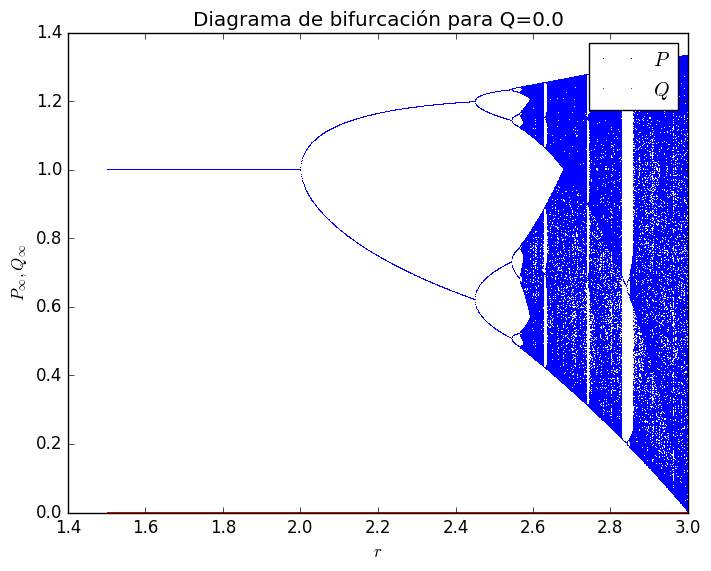

In [14]:
rrange1 = 1.5:2.0^-10:3.0
s,u,v,K = 3.0,1.25,1.95,1.0
X0 = [0.641,0.000]

F1(Xt,r)=CP_Simple(Xt,[r,s,u,v,K]);

plot1(F1, X0, rrange1, "Diagrama de bifurcación para Q=0.0");

Obtenemos un diagrama de bifurcación de doblamiento de periódo. Sin embargo, no nos interesa el análisis de éste, debido a que lo importante aquí es la dinámica de las dos componentes, no sólo de una. Análicemos para puntos cercanos a $Q=0.0$.

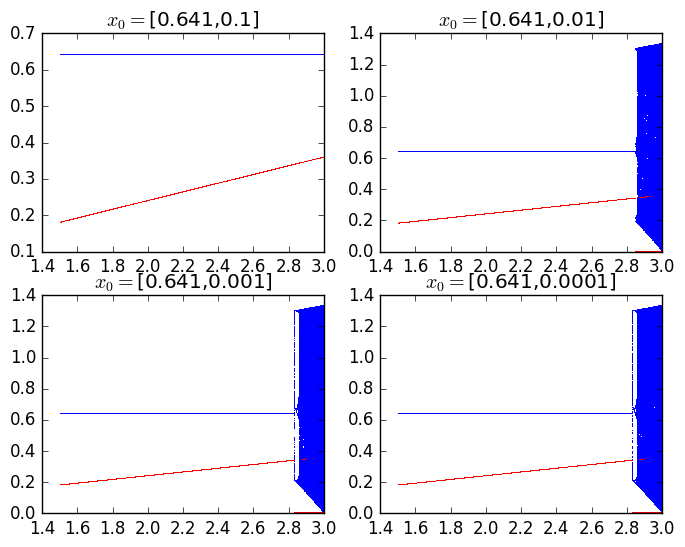

In [15]:
for i in 1:4
    X0 = [0.641,10.0^(-i)]
    Ps4,Qs4=diagbifurc2D(F1,X0, rrange1, 10000,500)
    Rs4 = ones(size(Ps4)[1])*rrange1'

    # Esto cambia las matrices en vectores; ayuda un poco para los dibujos
    Ps4 = reshape(Ps4, size(Ps4)[1]*size(Ps4)[2]);
    Qs4 = reshape(Qs4, size(Qs4)[1]*size(Qs4)[2]);
    Rs4 = reshape(Rs4, size(Rs4)[1]*size(Rs4)[2]);
    
    subplot(220+i)
    plot(Rs4,Ps4,"b,")
    plot(Rs4,Qs4,"r,")
    if i==3 && i==4 
        xlabel(L"r")
    end
    if i==1 && i==3 
        ylabel(L"P_{\infty}")
    end
    title(L"x_0="*"$X0")
    
end

Observemos que alrededor del $r\sim2.8$, ocurre un cambio de comportamiento. Creemos una función para determinar este cambio de regimen.

In [16]:
"""
    ordenar_eliminar_val_rep!(vec::Vector{Float64},ϵ::Float64)
Dado un vector `vec`, ordena y quita los elementos repetidos del vector con una tolerancia `ϵ`
"""
function ordenar_eliminar_val_rep!(vector::Vector{Float64},ϵ::Float64)
    
    N=length(vector)
    
    sort!(vector) #Ordena el vector.
    
    k = 1
    
    for i in 2:N          
        if abs(vector[k]-vector[k+1]) <= ϵ  #Obseva si los valores difieren más allá de epsilón.
            deleteat!(vector,k)             #Elimina el valor repetido.            
        else
            k=k+1
        end     
    end
    
    vector
    
end

#Método con ϵ predefinida.

ordenar_eliminar_val_rep!(vec)=ordenar_eliminar_val_rep!(vec,1e-5)

ordenar_eliminar_val_rep! (generic function with 2 methods)

Ahora, creamos una función que busque un aumento súbito de elementos en dos vectores, en un intervalo.

In [17]:
function mapeo2D_bif(F::Function , X_0, rrange::Range, tin::Int64,tout::Int64)
    #variable para almacenar el resultado
    rresultado=Float64
    
    for i in length(rrange)-1
        #función para r
        r(j)=rrange[j]
        
        #Definición de los dos vectores.
        vec1P,vec1Q=mapeo2D_lista(F, X_0,r(i)  ,tin,tout)
        vec2P,vec1Q=mapeo2D_lista(F, X_0,r(i+1),tin,tout)
        
        #Ordenamiento de los vectores.
        ordenar_eliminar_val_rep!(vec1P)
        ordenar_eliminar_val_rep!(vec2P)
        
        #Condición.        
        if length(vec1P)!=length(vec2P)
            rresultado=(r(i)+r(i+1))/2
            break
        end        
    end
    
    rresultado
end

mapeo2D_bif (generic function with 1 method)

Busquemos la región donde ocurre la bifurcación.

In [18]:
rrange1=2.8:2.0^-20:2.85
mapeo2D_bif(F1,[0.641,0.01], rrange1, 10000,500)

2.8499987602233885

In [19]:
mapeo2D_bif(F1,[0.641,0.001], rrange1, 10000,500)

2.8499987602233885

In [20]:
mapeo2D_bif(F1,[0.641,0.0001], rrange1, 10000,500)

2.8499987602233885

Observamos, que, como era de esperarse, la constante parece invariante en esa región. Grafiquemos el diagrama de fase en ese punto.

In [21]:
#Otra función para graficos recurrentes
function plot2(mapeo::Function, X_0, constantes, t::Int64, titulo::String,tipo::String)
    Ps,Qs = mapeo2D_lista(mapeo,X_0,constantes,t)
    
    #plots
    plot(Ps,Qs,tipo)
    xlabel(L"P")
    ylabel(L"Q")
    title(titulo)
    return Ps,Qs    
end

#Función con el tipo de gráfico estándar
plot2(mapeo::Function, X_0, constantes, t::Int64, titulo::String)=plot2(mapeo, X_0, constantes, t, titulo,"b")

#Función con varias cosas ya definidas.
plot2(mapeo::Function, X_0, constantes, titulo::String)=plot2(mapeo, X_0, constantes,100, titulo)

#Para ignorar los primeros tin
function plot2(mapeo::Function, X_0, constantes, tin::Int64,tout::Int64, titulo::String,tipo::String)
    Ps,Qs = mapeo2D_lista(mapeo,X_0,constantes,tin,tout)
    
    #plots
    plot(Ps,Qs,tipo)
    xlabel(L"P")
    ylabel(L"Q")
    title(titulo)
    return Ps,Qs    
end

plot2 (generic function with 4 methods)

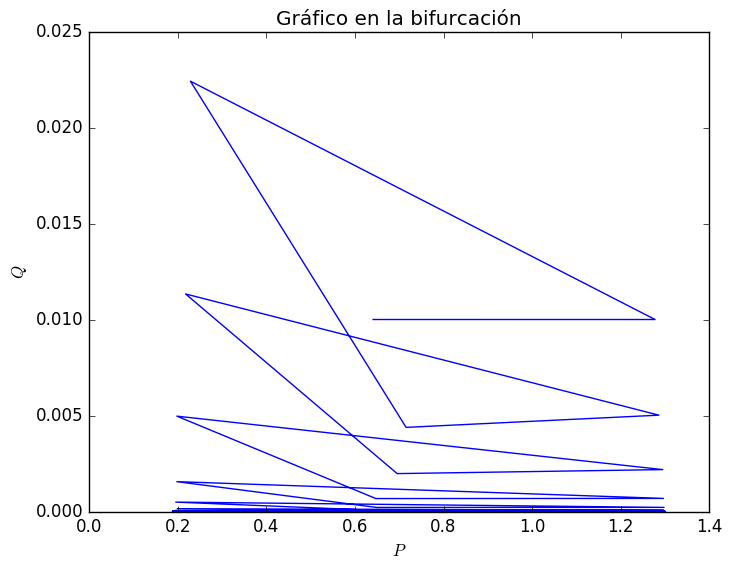

In [22]:
r = 2.8499987602233885
const1 = [r,s,u,v,K]
X0 = [0.641,0.01]

plot2(CP_Simple,X0,const1,"Gráfico en la bifurcación");


Se tiene un caso, que parece ser de periódo 3, en el que las depredadores se extinguen, y queda el comportamiento oscilante de las presas, cuyo equilibrio se define por el diagrama de bifurcación.

## Bifurcación del punto de equilibrio. Otro caso.

Si ahora, buscamos cerca de las zona donde los eigenvalores del Jacobiano en el punto de equilibro $E_2$ se vuelven imaginarios. Es decir $r_\Delta<-\frac{4(uv-v^2)}{u}$

In [23]:
s,u,v,K = 3.0,1.25,1.95,1.0
-4*(u*v-v^2)/u

4.367999999999999

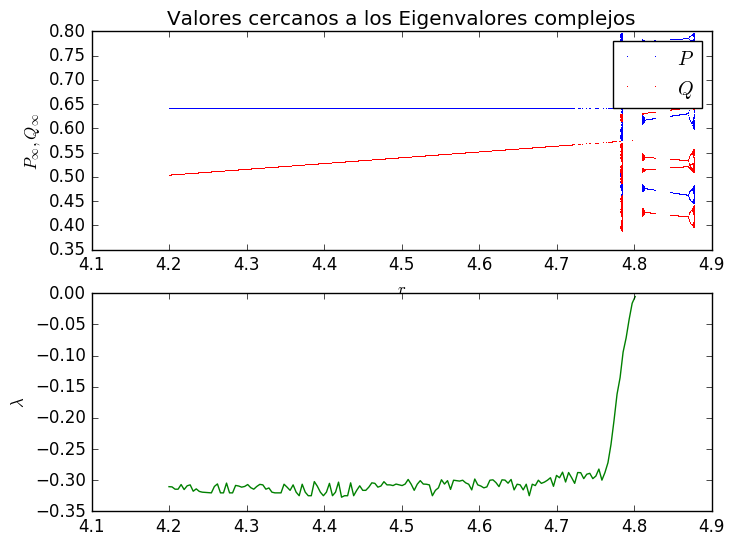

PyObject <matplotlib.text.Text object at 0x000000002B33FA58>

In [24]:
rrange1 = 4.2:2.0^-11:5.0
Lyrrange1 = 4.2:2.0^-8:5.0
#La función p sirve para definir valores iniciales cercanobs al punto de equilibrio
p4(r)=[0.641,pE2([r,s,u,v])[2]-0.061]
pp4(r)=pE2([r,s,u,v])
subplot(211)
plot1(F1, p4, rrange1, "Valores cercanos a los Eigenvalores complejos");
subplot(212)
Lyapuplot(F1, pp4, Lyrrange1 , 0.04, 1000)
ylabel(L"\lambda")

La dinámica en el punto parece ser normal, las condiciones se van al punto de equilibrio, sin embargo aparece una zona de comportamiento anormal.

In [25]:
#Otro metodo que permite graficar lineas que separan regiones
function plot1(F::Function, X_0, range::Range, A::Vector{Float64}, titulo::String)
    for i in 1:length(A)
        plot([A[i],A[i]],[0.36,0.80],"g")
    end
    plot1(F, X_0, range, titulo)
end

plot1 (generic function with 3 methods)

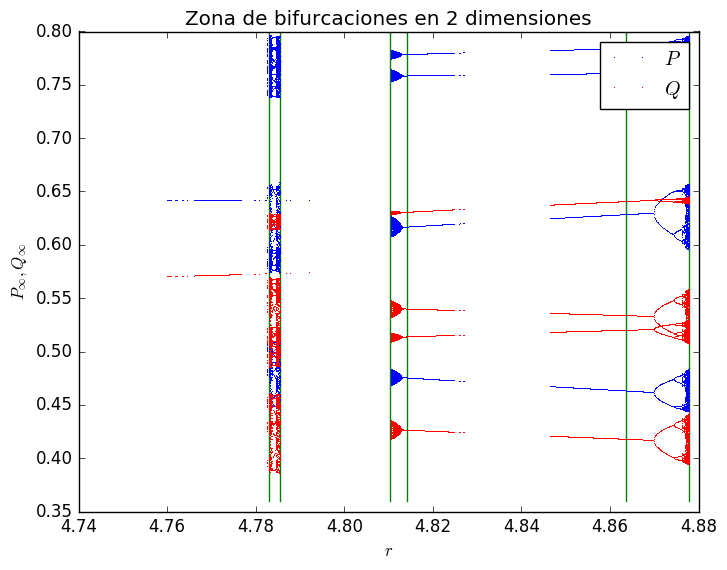

In [26]:
rrange1 = 4.76:2.0^-13:4.9

#La función p sirve para definir valores iniciales cercanobs al punto de equilibrio
p4(r)=[0.641,pE2([r,s,u,v])[2]-0.061]

#Lineas que dividen las regiones
A=[4.782921348,4.785393258,4.810337079,4.814157303,4.863595506,4.877752809]

Rs4,Ps4,Qs4=plot1(F1, p4, rrange1, A, "Zona de bifurcaciones en 2 dimensiones");

Observamos que tenemos regiones de comportamiento extraño, y ¡Una zona con bifurcaciones en 2 dimensiones!, enseguida graficamos en dos dimensiones el diagrama de fase.

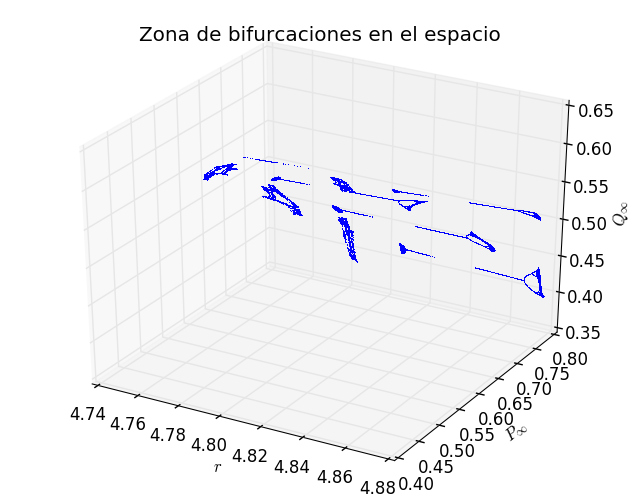

PyObject <matplotlib.text.Text object at 0x000000002ACACF98>

In [27]:
plot3D(Rs4,Ps4,Qs4,"b,")
xlabel(L"r")
ylabel(L"P_\infty")
zlabel(L"Q_\infty")
title("Zona de bifurcaciones en el espacio")

Tenemos tres regiones de interés, marcadas entre líneas verdes:

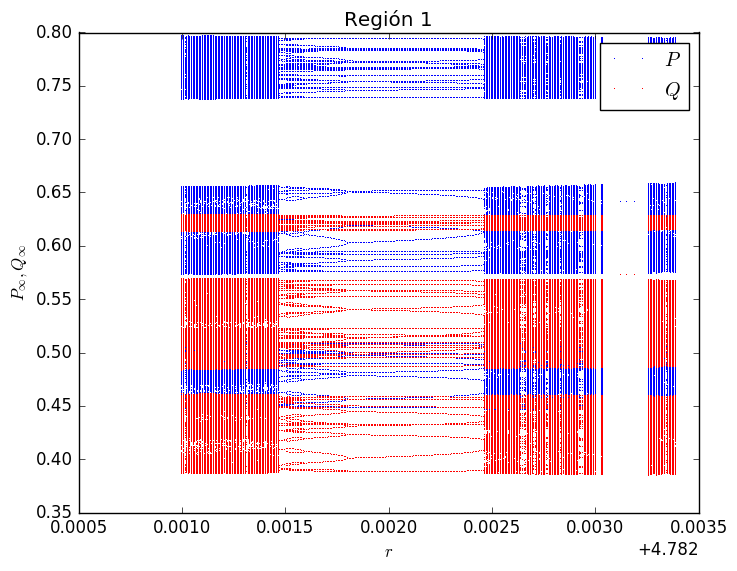

In [28]:
rrange1 = 4.782921348:2.0^-17:4.785393258
Rs,Ps6,Qs6 = plot1(F1, p4, rrange1, 100000,3000, "Región 1");

Se observa una región de extrañas bifurcaciones, entre zonas muy ruidosas. Parece ser la superposición de distintos comportamientos.

La región 2 tiene un comportamiento más sencillo de definir.

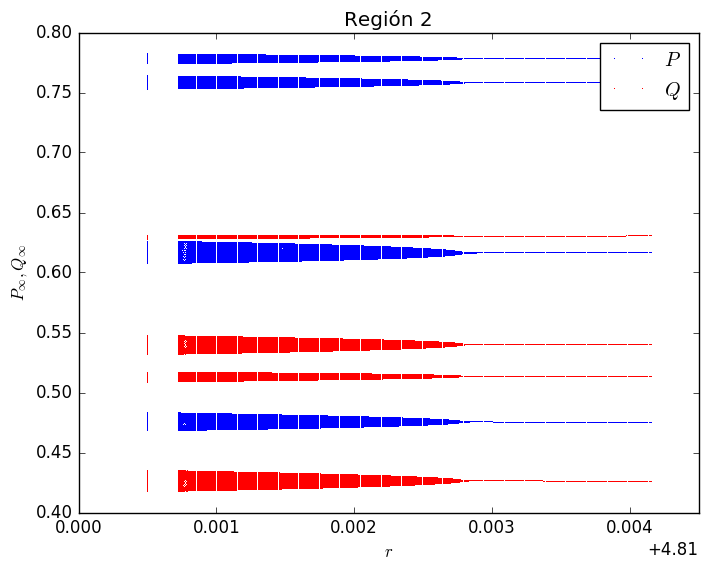

In [29]:
rrange1 = 4.810337079:2.0^-17:4.814157303
plot1(F1, p4, rrange1, 100000,3000, "Región 2");

En el siguiente gráfico vemos como hay una región donde el mapeo tiende a 4 zonas, que ha medida que el valor de $r$, se vuelven más cerradas.

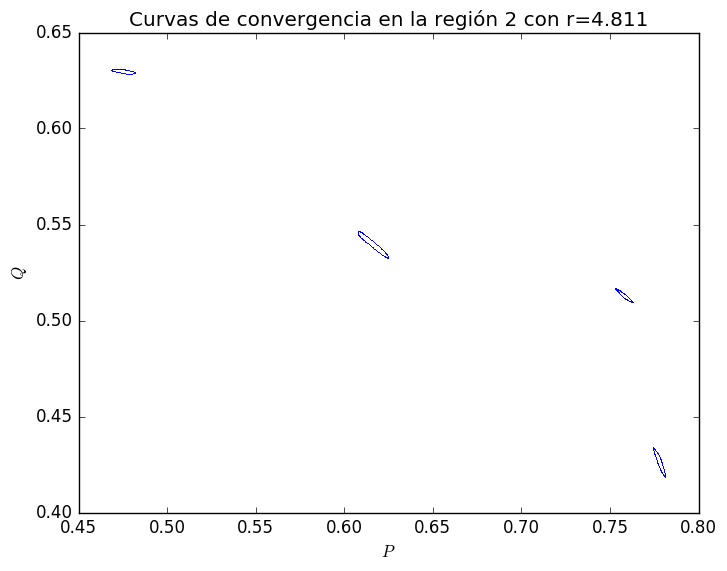

In [30]:
r = 4.81+0.001
X0 =  p4(r)
plot2(F1, X0, r, 2000,500, "Curvas de convergencia en la región 2 con r=$r","b,");

Aquí ya las zonas están bastante cerradas.

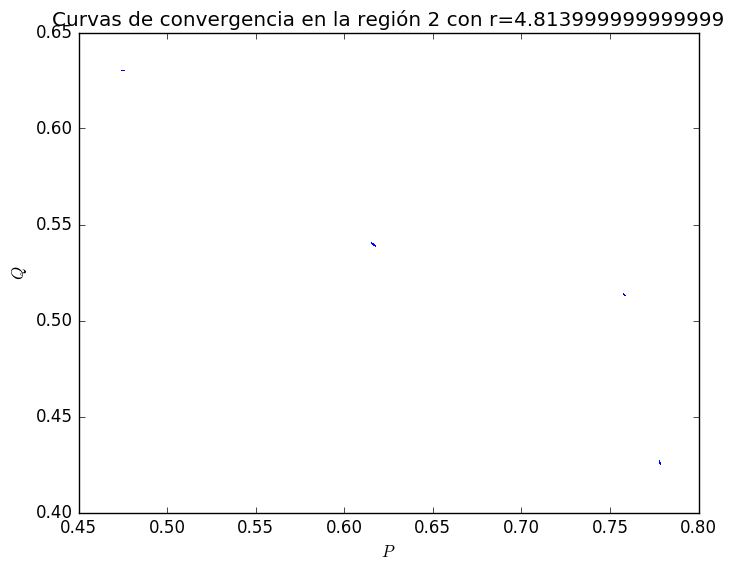

In [31]:
r = 4.81+0.004
X0 =  p4(r)
plot2(F1, X0, r, 2000,500, "Curvas de convergencia en la región 2 con r=$r","b,");

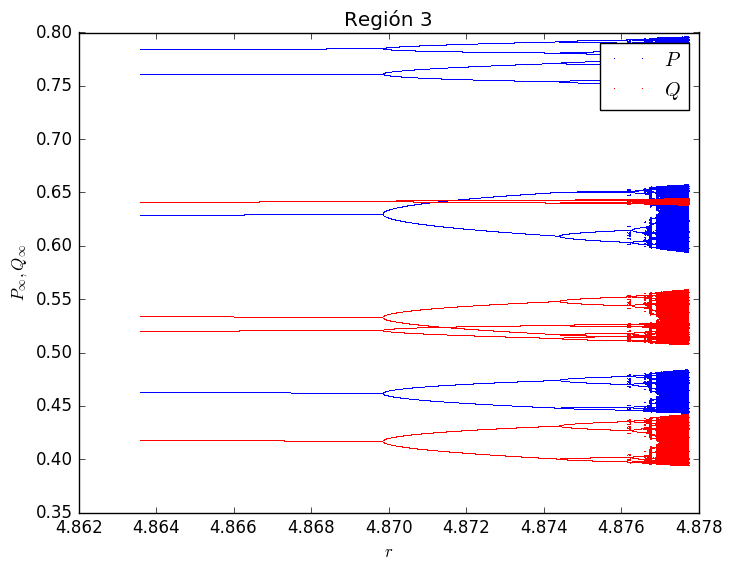

In [32]:
rrange1 = 4.863595506:2.0^-17:4.877752809
plot1(F1, p4, rrange1, 100000,3000, "Región 3");

En la región 3 tenemos un comportamiento muy similar al que ocurre en las zonas de doblamiento de periodo de una dimensión, pero en lugar de tener la bifurcación en un plano, la tenemos en el espacio.

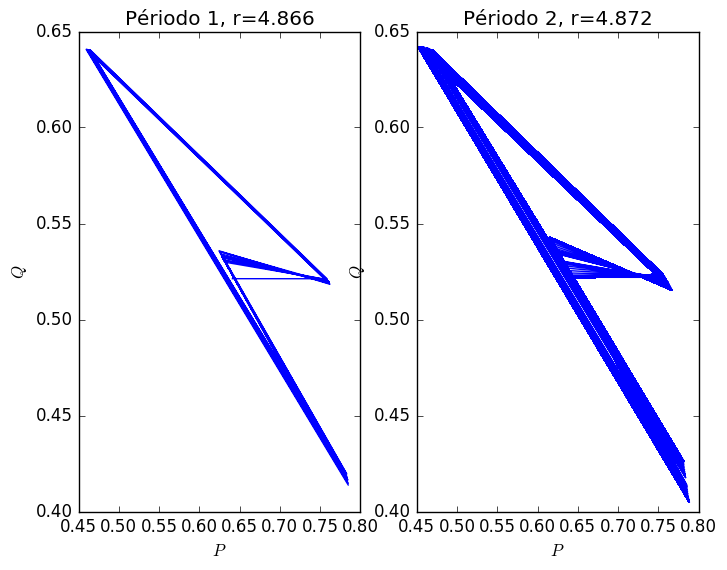

In [33]:
subplot(121)
r = 4.866
X0 =  p4(r)
plot2(F1, X0, r, 10000, "Périodo 1, r=$r");

subplot(122)
r = 4.872
X0 =  p4(r)
plot2(F1, X0, r, 10000, "Périodo 2, r=$r");

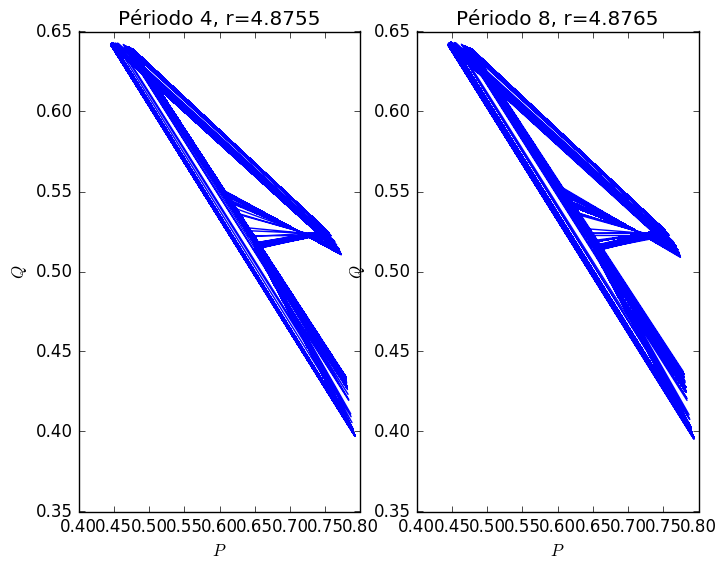

In [34]:
subplot(121)
r = 4.8755
X0 =  p4(r)
plot2(F1, X0, r, 10000, "Périodo 4, r=$r");

subplot(122)
r = 4.8765
X0 =  p4(r)
plot2(F1, X0, r, 10000, "Périodo 8, r=$r");

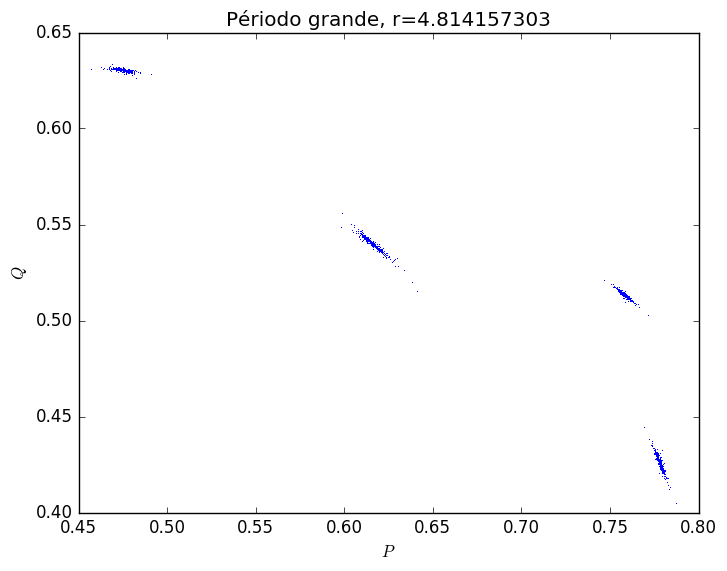

In [35]:
r = 4.814157303
X0 =  p4(r)
plot2(F1, X0, r, 10000, "Périodo grande, r=$r","b,");

Observamos que las bifurcaciones aumentan alrededor de 4 puntos de equilibrio.

## Valores cercanos a $v_{\lambda_{1,2}=0}=1+u$ ##

Iniciamos con las siguientes constantes, con  $v=1+u$

In [36]:
s,u,K = 3.0,0.25,1.0
v=1+u

const2 = [r,s,u,v,K]
p2(r)=pE2([r,s,u,v])-[0.0,0.06]
F2(Xt,r)=CP_Simple(Xt,[r,s,u,v,K]);

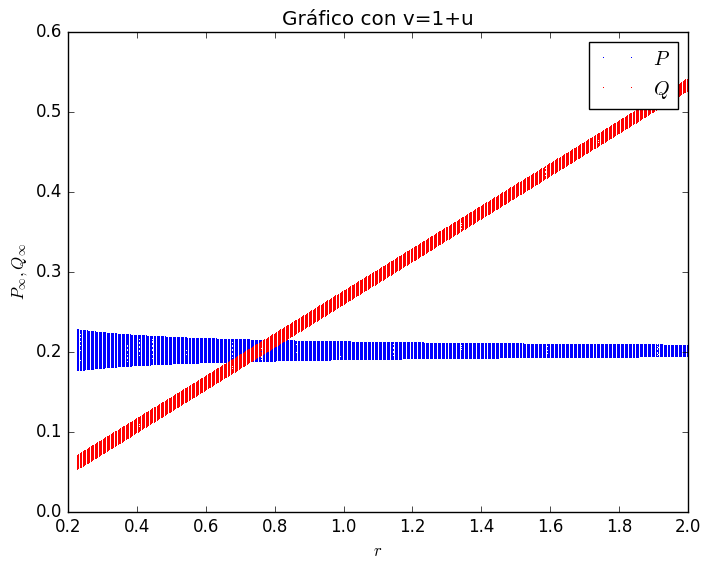

In [37]:
rrange2 = 0.0:2.0^-8:2.0
plot1(F2, p2, rrange2, 20000,500, "Gráfico con v=1+u");

Se observa un comportamiento de trompeta: es decir, los valores tienden a una región ancha en lugar de a un punto. También vemos que mientras aumenta la $r$ la región donde converge el mapeo se va reduciendo. Grafiquemos un diagrama de fase.

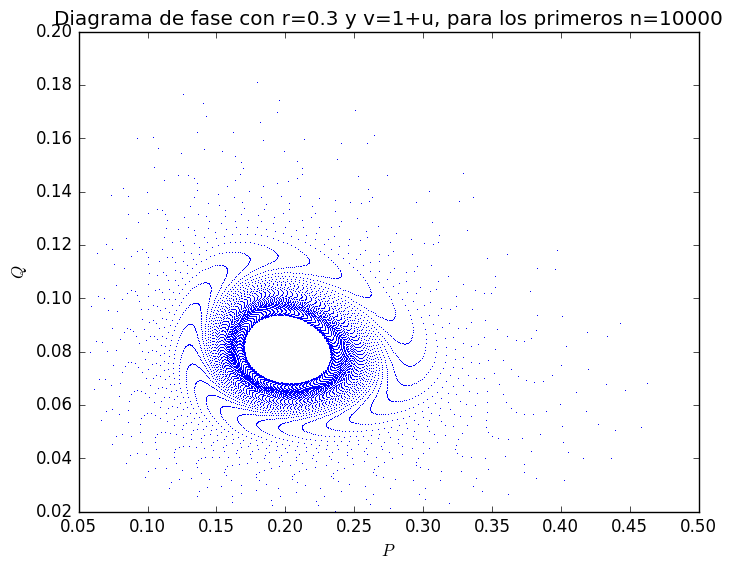

In [38]:
r = 0.3
X0 =  p2(r)
plot2(F2, X0, r, 10000, "Diagrama de fase con r=$r y v=1+u, para los primeros n=10000","b,");

Si se aumenta el número de iterados, entonces se puede ver a donde converge el mapeo, una región cerrada del espacio fase.

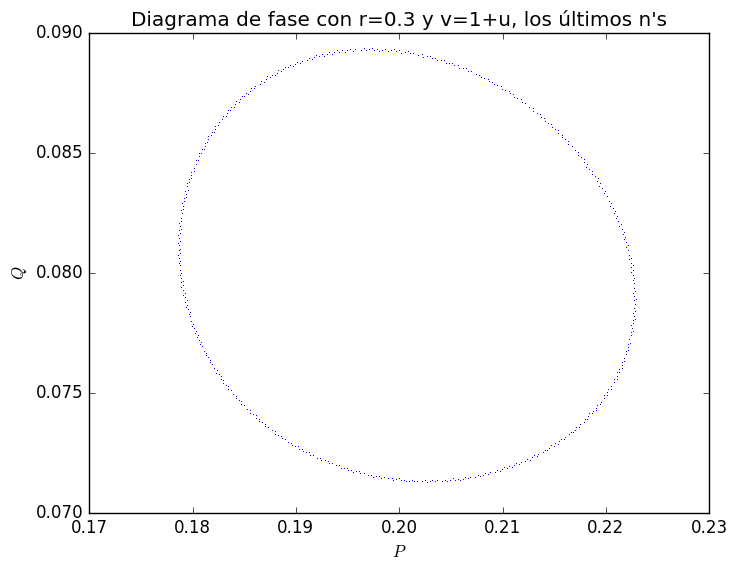

In [39]:
r = 0.3
X0 =  p2(r)
plot2(F2, X0, r, 20000,500, "Diagrama de fase con r=$r y v=1+u, los últimos n's","b,");

Obtengamos sólo el contorno de las figuras cuando $P_\infty$ y $Q_\infty$. Se hace esto, simplemente obteniendo los máximos.

In [40]:
function mapeo2D_max(F::Function , E2::Function, X_0, rrange::Range, tin::Int64,tout::Int64)
    #variable para almacenar el resultado
    Pres=Float64[]
    Qres=Float64[]
    Rres=Float64[]
    
    for r in rrange        
        #Definición de los dos vectores.
        vecP,vecQ=mapeo2D_lista(F, X_0, r, tin,tout)
        
        #maximos
        maxP=maximum(vecP)-E2(r)[1]
        maxQ=maximum(vecQ)-E2(r)[2]
        
        
        if isnan(maxP) == false && isnan(maxQ) == false
            push!(Rres,r)
            push!(Pres,maxP)
            push!(Qres,maxQ)
        end
    end
    
    Rres, Pres,Qres
end

mapeo2D_max (generic function with 1 method)

También, debemos restar la posición del punto de equilibrio, para poder ver que tanto osc

In [41]:
rrange2 = 0.0:2.0^-8:10.0
pp2(r)=pE2([r,s,u,v])
Rs3,Ps3,Qs3 = mapeo2D_max(F2 ,pp2, p2, rrange2, 20000,500);


Utilizamos un paquete para ajustar la curva.

In [42]:
#Ajuste propuesto, r es la variable, p es un arreglo de constantes.
model(r, p) = p[1]*(r).^(-p[2]).+p[3]
#arreglo con el peso de los valores, en este caso todos son igualmente pesados.
w=ones(length(Rs3))
#Ajuste del modelo.
fitP = curve_fit(model, Rs3, Ps3,w)
fitQ = curve_fit(model, Rs3, Qs3,w);

El modelo electo es $ P,Q = a(r+b)^{-c}+d$

In [43]:
fitP

LsqFit.LsqFitResult{Float64}(0,[0.0132109,0.523979,-0.00187789,1.0,1.0,1.0,1.0,1.0,1.0,1.0  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],[2.42017e-5,3.7132e-5,0.000141916,7.54947e-5,6.88282e-5,5.53113e-5,7.67482e-5,9.11261e-5,7.35852e-5,8.29547e-5  …  -6.41735e-5,-6.4306e-5,-6.32613e-5,-6.36033e-5,-6.42276e-5,-6.81543e-5,-5.27696e-5,-5.05102e-5,-4.57274e-5,-3.7559e-5],[2.17705 0.0427022 … 0.0 0.0; 2.15764 0.0418342 … 0.0 0.0; … ; 0.300102 -0.00910715 … 0.0 0.0; 0.30004 -0.00910683 … 0.0 0.0])

In [44]:
P1=[0.0132109,0.523979,-0.00187789];

La curva para las presas está definida como $P_{contorno,\infty}\propto \frac{1}{\sqrt{r}}$

In [45]:
fitQ

LsqFit.LsqFitResult{Float64}(0,[0.0330781,0.0423991,-0.0247437,1.0,1.0,1.0,1.0,1.0,1.0,1.0  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],[0.000924559,0.000925741,0.000910719,0.000899367,0.000901003,0.000892826,0.000906815,0.00085843,0.000855748,0.000854023  …  0.000227346,0.00022827,0.00023102,0.000229443,0.000220243,0.000214723,0.000249909,0.000287662,0.000299672,0.00031944],[1.06498 0.0523033 … 0.0 0.0; 1.0642 0.0516636 … 0.0 0.0; … ; 0.907198 -0.0689323 … 0.0 0.0; 0.907183 -0.0689429 … 0.0 0.0])

In [46]:
Q1=[0.0330781,0.0423991,-0.0247437];

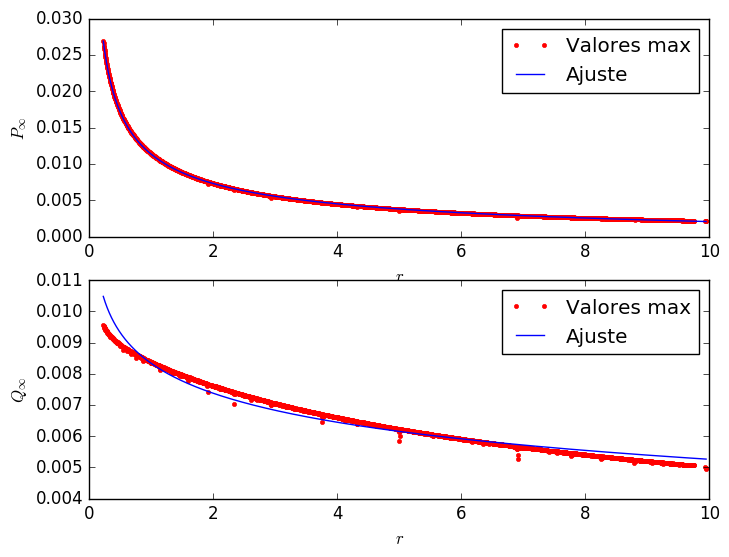

PyObject <matplotlib.legend.Legend object at 0x000000004813D4E0>

In [47]:
subplot(211)
PAs3=[model(r,P1) for r in Rs3]
plot(Rs3,Ps3,"r.",label=("Valores max"))
plot(Rs3,PAs3,label=("Ajuste"))
xlabel(L"r")
ylabel(L"P_{\infty}")
legend()

subplot(212)

QAs3=[model(r,Q1) for r in Rs3]
plot(Rs3,Qs3,"r.",label=("Valores max"))
plot(Rs3,QAs3,label=("Ajuste"))
xlabel(L"r")
ylabel(L"Q_{\infty}")
legend()

Naturalmente, si el valor de $v$ es ligeramente menor, se pierde este comportamiento, teniendo la convergencia de la bifurcación en un punto.

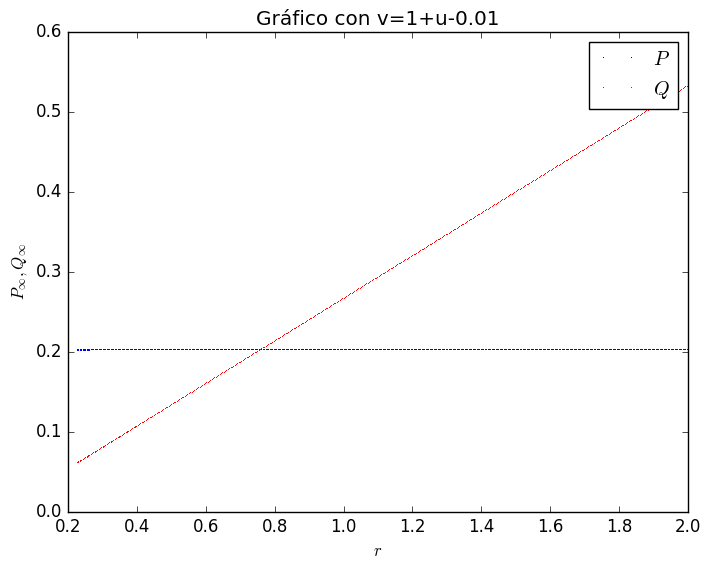

In [48]:
s,u,K = 3.0,0.25,1.0
v=1+u-0.01

const2 = [r,s,u,v,K]
rrange2 = 0.0:2.0^-8:2.0
plot1(F2, p2, rrange2, 20000,500, "Gráfico con v=1+u-0.01");

## Valores cercanos a $v=\frac{1}{2}(1+2u)$

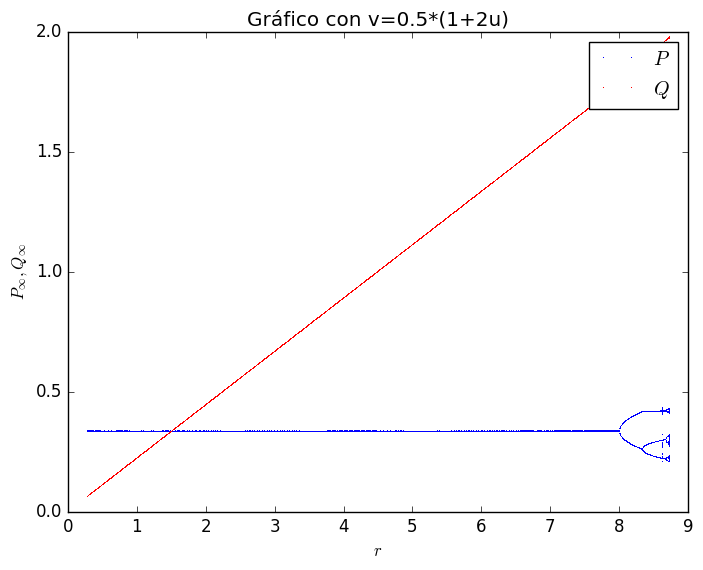

In [49]:
s,u,K = 3.0,0.25,1.0
v=0.5(1+2u)
p3(r)=pE2([r,s,u,v])-[0.0,0.06]
F3(Xt,r)=CP_Simple(Xt,[r,s,u,v,K]);
rrange3 = 0.0:2.0^-8:10.0
plot1(F3, p3, rrange3, 20000,500, "Gráfico con v=0.5*(1+2u)");

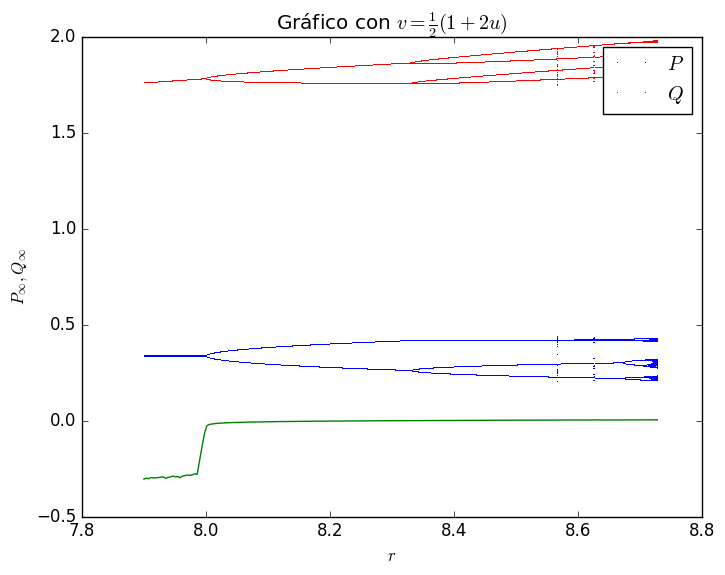

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000484B5748>

In [50]:
rrange3 = 7.9:2.0^-10:9.0
R3,P3,Q3=plot1(F3, p3, rrange3, 20000,500, "Gráfico con "*L"v=\frac{1}{2}(1+2u)");
pp3(r)=pE2([r,s,u,v])
Lyrrange3 = 7.9:2.0^-8:9.0
Lyapuplot(F3, pp3, Lyrrange3 , 0.2, 5000)

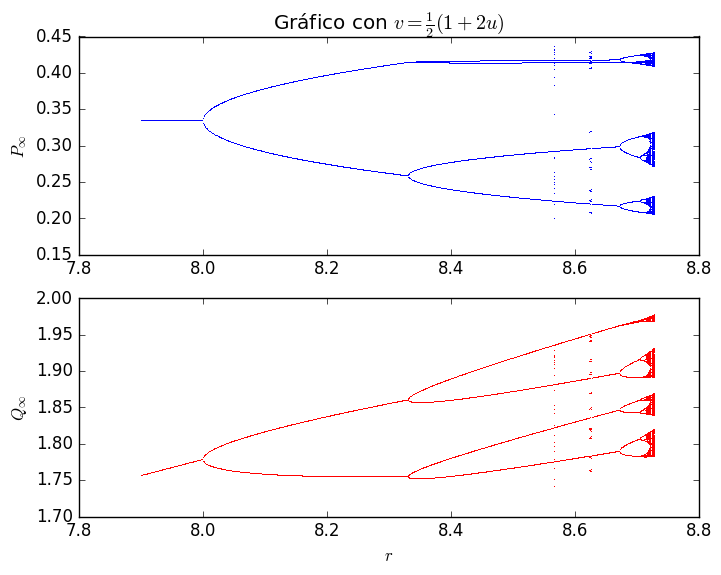

PyObject <matplotlib.text.Text object at 0x000000002B8FF4E0>

In [51]:
subplot(211)
plot(R3,P3,"b,")
title("Gráfico con "*L"v=\frac{1}{2}(1+2u)")
ylabel(L"P_\infty")

subplot(212)
plot(R3,Q3,"r,")
ylabel(L"Q_\infty")
xlabel(L"r")

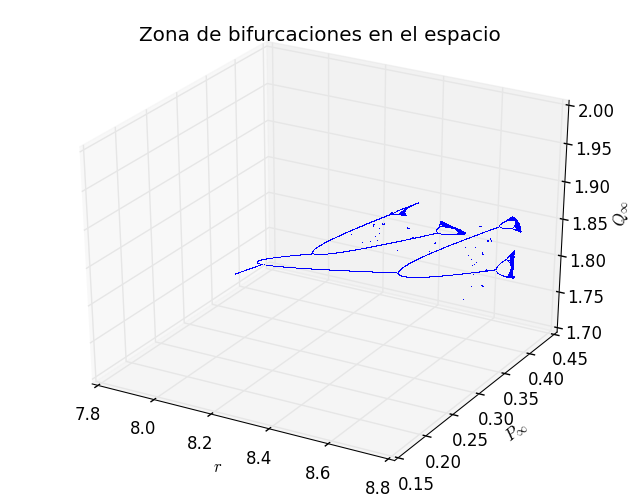

PyObject <matplotlib.text.Text object at 0x000000002AFE52B0>

In [52]:
plot3D(R3,P3,Q3,"b,")
xlabel(L"r")
ylabel(L"P_\infty")
zlabel(L"Q_\infty")
title("Zona de bifurcaciones en el espacio")

Se tiene un nuevo gráfico, con bifurcaciones de doblamiento de periódo torcidas.

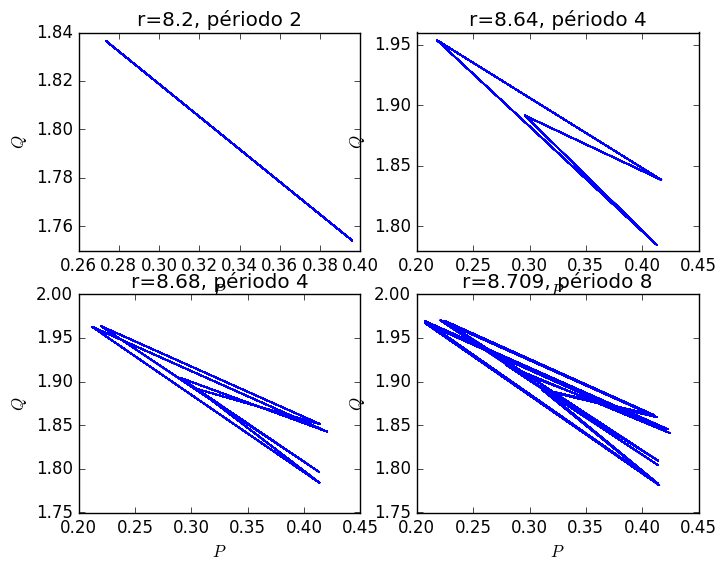

In [53]:
subplot(221)
r = 8.2
X0 =  p3(r)
plot2(F3, X0, r, 20000,500, "r=$r, périodo 2","b");

subplot(222)
r = 8.64
X0 =  p3(r)
plot2(F3, X0, r, 20000,500, "r=$r, périodo 4","b");

subplot(223)
r = 8.68
X0 =  p3(r)
plot2(F3, X0, r, 20000,500, "r=$r, périodo 4","b");

subplot(224)
r = 8.709
X0 =  p3(r)
plot2(F3, X0, r, 20000,500, "r=$r, périodo 8","b");

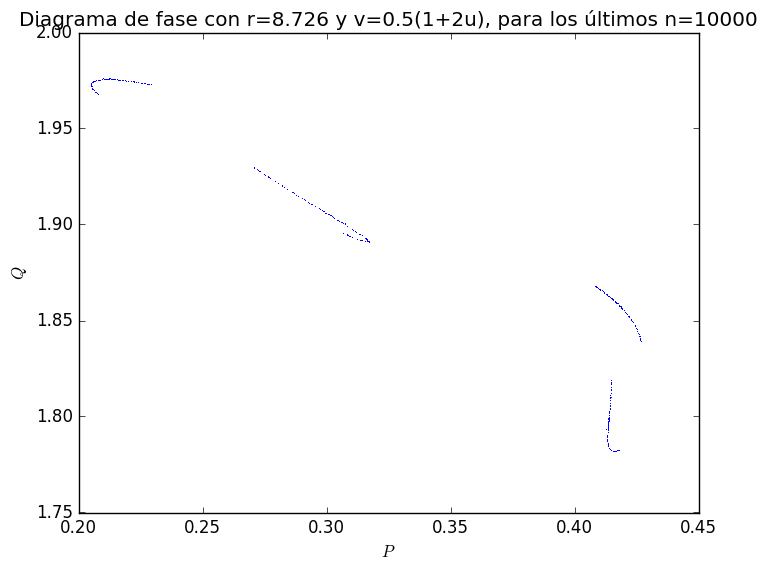

In [54]:
r = 8.726
X0 =  p3(r)
plot2(F3, X0, r, 20000,500, "Diagrama de fase con r=$r y v=0.5(1+2u), para los últimos n=10000","b,");

Aunque el comportamiento es el mismo que el que ya se describió, en el otro caso de bifurcaciones de doblamiento de périodo.

Si graficamos un poco después:

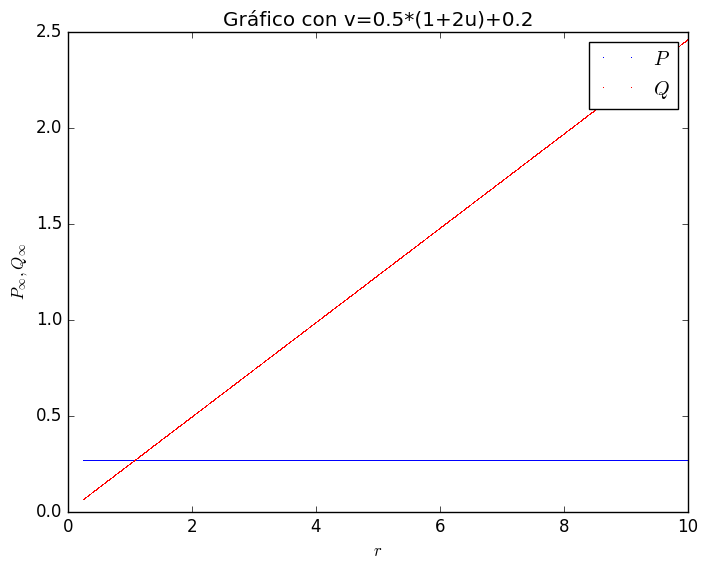

In [55]:
s,u,K = 3.0,0.25,1.0
v=0.5(1+2u)+0.2
p3(r)=pE2([r,s,u,v])-[0.0,0.06]
F3(Xt,r)=CP_Simple(Xt,[r,s,u,v,K]);
rrange3 = 0.0:2.0^-8:10.0
plot1(F3, p3, rrange3, 20000,500, "Gráfico con v=0.5*(1+2u)+0.2");


Ya no aparece la zona con doblamiento de periódo. 

Un poco antes, aparece una zona interesante:

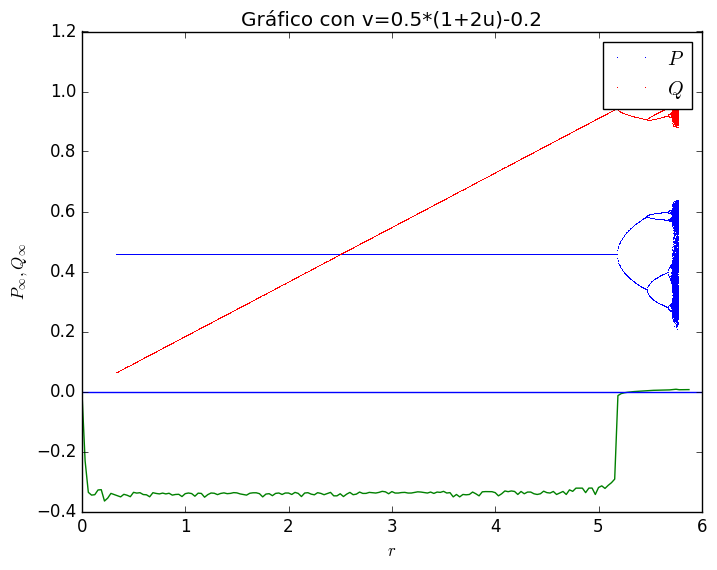

 at In[49]:4 overwritten at In[55]:4.

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002B037080>

F3(Any, Any) in module Main at In[55]:4 overwritten at In[56]:4.


In [56]:
s,u,K = 3.0,0.25,1.0
v=0.5(1+2u)-0.2
p3(r)=pE2([r,s,u,v])-[0.0,0.06]
F3(Xt,r)=CP_Simple(Xt,[r,s,u,v,K]);
rrange3 = 0.0:2.0^-8:10.0
plot1(F3, p3, rrange3, 20000,500, "Gráfico con v=0.5*(1+2u)-0.2");

pp3(r)=pE2([r,s,u,v])
Lyrrange3 = 0.0:2.0^-5:10.0
Lyapuplot(F3, pp3, Lyrrange3 , 0.2, 5000)
plot([0.0,6.0],[0.0,0.0])

Se observa que el exponente de Lyapunov $\lambda>0$, entonces tenemos regiones caóticas.

## Conclusiones

A pesar de que el modelo que usamos es una de las versiones más simples del módelo de Depredador-Presa, el modelo tiene mucha dinámica y fenómenos interesantes.

Aparecen zonas con bifurcaciones de doblamiento de périodo, algunas de éstas pueden tener caos.

Por lo regular, este modelo converge a un punto, o bien a una órbita cerrada.

En resumen, se tiene que:

1. En $r<\frac{1}{2}(1+2u)$ se tienen regiones donde existen bifurcaciones de doblamiento de périodo y caos.
2. En $r>1+u$ es dónde inician las bifurcaciones de Neimark-Sacker, alrededor de $E_2=\left[\frac{u}{v} ,\frac{r}{s}\left(1-\frac{u}{ v} \right) \right]$.
3. Entre estas regiones $\frac{1}{2}(1+2u)<r<1+u$ El modelo presenta un comportamiento estable, con el punto $E_2$ fijo y atractivo.
4. El punto $E_0=[0,0]$ Es un punto silla, atractivo para los depredadores, repulsivo para las presas.
5. El punto $E_0=[1.0,0.0]$ Es un otro punto silla, para las presas pero repulsivo para los depredadores.